In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation/Crop_recommendation.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

df= pd.read_csv('/kaggle/input/crop-recommendation/Crop_recommendation.csv')

In [3]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
dtypes: float64(6), int64(3), object(1)
memory usage: 172.0+ KB


In [5]:
#checking missing values
df.isnull().sum()

Nitrogen          0
phosphorus        0
potassium         0
temperature       0
humidity          0
ph                0
rainfall          0
label             0
Unnamed: 8     2200
Unnamed: 9     2200
dtype: int64

In [6]:
df.columns.tolist()

['Nitrogen',
 'phosphorus',
 'potassium',
 'temperature',
 'humidity',
 'ph',
 'rainfall',
 'label',
 'Unnamed: 8',
 'Unnamed: 9']

In [7]:
df.drop(["Unnamed: 8","Unnamed: 9"], axis=1, inplace=True)

In [8]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
df.tail()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [10]:
#let's some focus on crop types

In [11]:
df.groupby(["label"]).head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2100,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
2101,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2102,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
2103,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee


In [12]:
# checking every label values
# first i've checked unique label values; i will use lowercase method to fix possible matching issues

df["label"] = df["label"].str.lower()

rice_df = df[df["label"] == "rice"]

print(rice_df)

    Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0         90          42         43    20.879744  82.002744  6.502985   
1         85          58         41    21.770462  80.319644  7.038096   
2         60          55         44    23.004459  82.320763  7.840207   
3         74          35         40    26.491096  80.158363  6.980401   
4         78          42         42    20.130175  81.604873  7.628473   
..       ...         ...        ...          ...        ...       ...   
95        88          46         42    22.683191  83.463583  6.604993   
96        93          47         37    21.533463  82.140041  6.500343   
97        60          55         45    21.408658  83.329319  5.935745   
98        78          35         44    26.543481  84.673536  7.072656   
99        65          37         40    23.359054  83.595123  5.333323   

      rainfall label  
0   202.935536  rice  
1   226.655537  rice  
2   263.964248  rice  
3   242.864034  rice  
4   262.

In [13]:
rice_df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [14]:
#checking rows after matching
rice_df.tail()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576693,rice
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice
99,65,37,40,23.359054,83.595123,5.333323,188.413665,rice


In [15]:
#we can reach every crops dataframe
rice_df.describe()


,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,79.890000,47.580000,39.870000,23.689332,82.272822,6.425471,236.181114
std,11.917981,7.904966,2.946167,2.031272,1.418381,0.768692,34.291825
min,60.000000,35.000000,35.000000,20.045414,80.122675,5.005307,182.561632
25%,69.000000,41.000000,38.000000,21.927064,80.952094,5.869992,204.334023
50%,80.000000,47.000000,40.000000,23.734837,82.189357,6.363804,233.119859
75%,91.000000,54.250000,42.000000,25.513702,83.470254,7.039147,264.126903
max,99.000000,60.000000,45.000000,26.929951,84.969072,7.868475,298.560117


In [16]:
# it is possible to code a list and a function for every label values(another option):

crops = pd.DataFrame(df["label"].unique(), columns=["crop"])
crop_list = df["label"].unique().tolist()

def create_crop_df(df):
    crop_list = df["label"].unique().tolist()
    crop_df_dict = {}
    for crop in crop_list:
        crop_df_dict[crop] = df[df["label"] == crop]
    return crop_df_dict

crop_df_dict = create_crop_df(df)

rice_df = crop_df_dict["rice"]
rice_df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [17]:
print(crop_list)

['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']


In [18]:
def create_crop_df(df):
    crop_list = df["label"].unique().tolist()
    crop_df_dict = {}
    for crop in crop_list:
        crop_df_dict[crop] = df[df["label"] == crop]
    return crop_df_dict

crop_df_dict = create_crop_df(df)

In [19]:
maize_df = crop_df_dict["maize"]
maize_df.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,100.00000,100.000000,100.0000,100.000000,100.000000,100.000000,100.000000
mean,77.76000,48.440000,19.7900,22.389204,65.092249,6.245190,84.766988
std,11.94949,8.010498,2.9415,2.679360,5.448699,0.412681,15.547339
min,60.00000,35.000000,15.0000,18.041855,55.282204,5.513698,60.651715
25%,67.75000,42.750000,17.0000,19.822579,60.579884,5.854734,70.384556
50%,76.00000,48.500000,20.0000,22.844456,65.303845,6.259181,83.471553
75%,87.00000,56.000000,22.0000,24.900640,69.431596,6.602366,99.877090
max,100.00000,60.000000,25.0000,26.549864,74.829137,6.995844,109.751538


In [20]:
apple_df = crop_df_dict["apple"]
apple_df.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,20.800000,134.220000,199.890000,22.630942,92.333383,5.929663,112.654779
std,11.863704,8.139665,3.320871,0.827404,1.458551,0.268932,7.102985
min,0.000000,120.000000,195.000000,21.036527,90.025751,5.514253,100.117344
25%,10.000000,126.750000,197.000000,22.163206,90.970127,5.705800,106.070135
50%,24.000000,136.500000,200.000000,22.628290,92.416541,5.885818,112.979230
75%,30.000000,141.000000,203.000000,23.344066,93.509252,6.135616,118.449546
max,40.000000,145.000000,205.000000,23.996862,94.920481,6.499227,124.983162


In [21]:
#checking by groupby function for each factor in deail:
#df.groupby('label')['phosphorus'].agg(['mean', 'sum', 'max']).sort_values(by='mean', ascending=True)
#df.groupby('label')['potassium'].agg(['mean', 'sum', 'max']).sort_values(by='mean', ascending=True)
#df.groupby('label')['temperature'].agg(['mean', 'sum', 'max']).sort_values(by='mean', ascending=True)
#df.groupby('label')['humidity'].agg(['mean', 'sum', 'max']).sort_values(by='mean', ascending=True)
#df.groupby('label')['ph'].agg(['mean', 'sum', 'max']).sort_values(by='mean', ascending=True)
#df.groupby('label')['rainfall'].agg(['mean', 'sum', 'max']).sort_values(by='mean', ascending=True)

df.groupby('label')['Nitrogen'].agg(['mean', 'sum', 'max']).sort_values(by='mean', ascending=True)

,mean,sum,max
label,,,
lentil,18.77,1877,40
pomegranate,18.87,1887,40
orange,19.58,1958,40
mango,20.07,2007,40
pigeonpeas,20.73,2073,40
kidneybeans,20.75,2075,40
apple,20.80,2080,40
mungbean,20.99,2099,40
mothbeans,21.44,2144,40


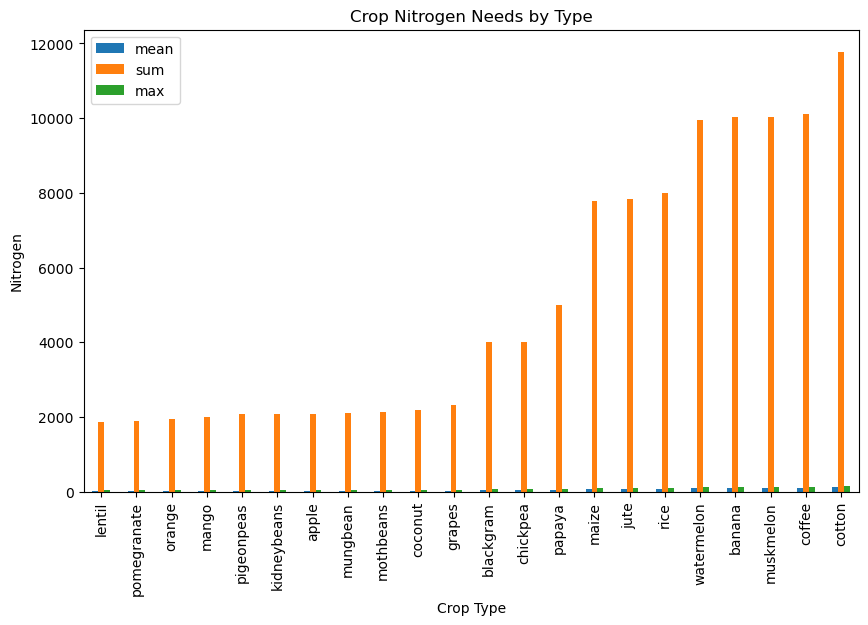

In [22]:
import matplotlib.pyplot as plt

nitrogen_data = df.groupby('label')['Nitrogen'].agg(['mean', 'sum', 'max']).sort_values(by='mean', ascending=True)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
nitrogen_data.plot(kind='bar', ax=ax)
ax.set_xlabel('Crop Type')
ax.set_ylabel('Nitrogen')
ax.set_title('Crop Nitrogen Needs by Type')
plt.show()

In [23]:
df.groupby('label')['phosphorus'].agg(['mean', 'sum', 'max']).sort_values(by='mean', ascending=True)

,mean,sum,max
label,,,
orange,16.55,1655,30
coconut,16.93,1693,30
watermelon,17.00,1700,30
muskmelon,17.72,1772,30
pomegranate,18.75,1875,30
mango,27.18,2718,40
coffee,28.74,2874,40
cotton,46.24,4624,60
jute,46.86,4686,60


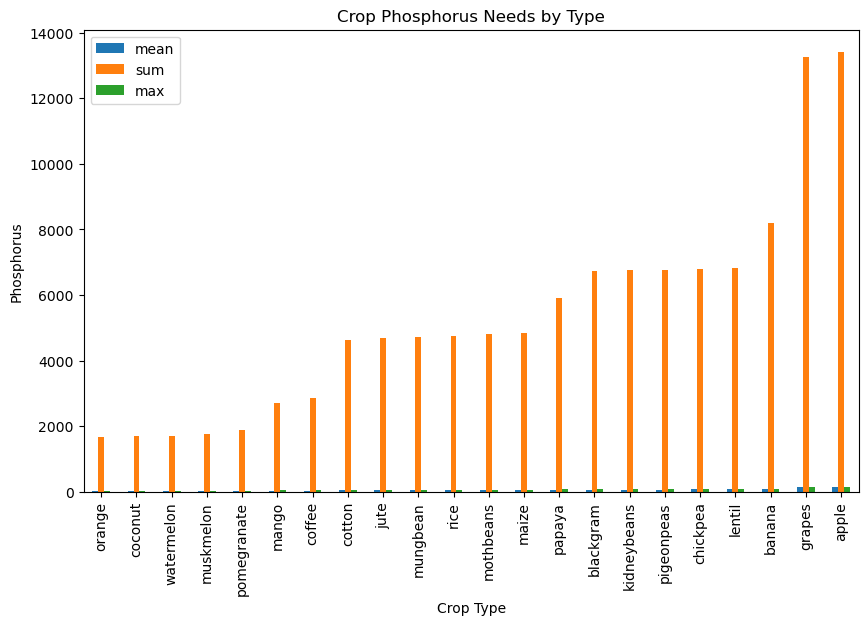

In [24]:
phosphorus_data = df.groupby('label')['phosphorus'].agg(['mean', 'sum', 'max']).sort_values(by='mean', ascending=True)
# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
phosphorus_data.plot(kind='bar', ax=ax)
ax.set_xlabel('Crop Type')
ax.set_ylabel('Phosphorus')
ax.set_title('Crop Phosphorus Needs by Type')
plt.show()

In [25]:
df.groupby('label')['potassium'].agg(['mean', 'sum', 'max']).sort_values(by='mean', ascending=True)

,mean,sum,max
label,,,
orange,10.01,1001,15
blackgram,19.24,1924,25
lentil,19.41,1941,25
cotton,19.56,1956,25
maize,19.79,1979,25
mungbean,19.87,1987,25
kidneybeans,20.05,2005,25
mothbeans,20.23,2023,25
pigeonpeas,20.29,2029,25


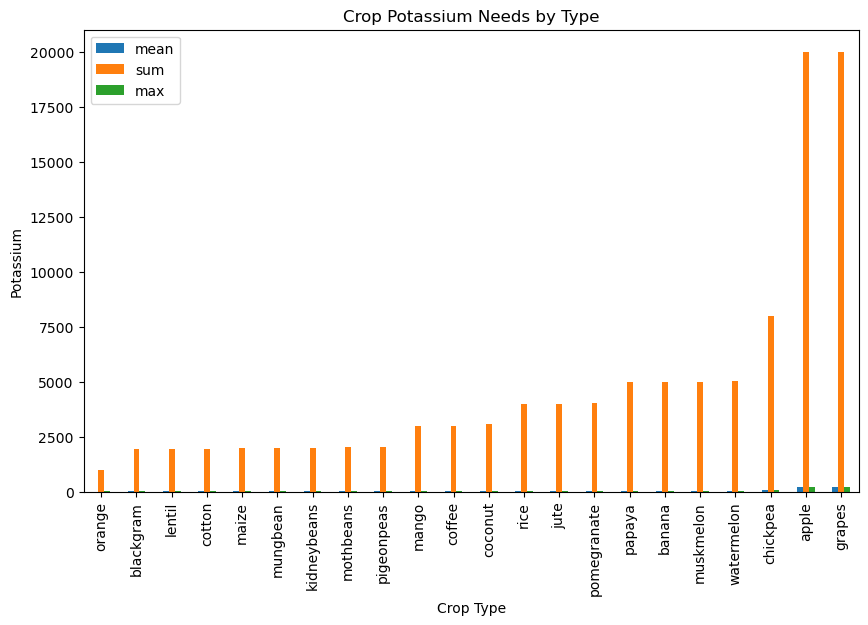

In [26]:
potassium_data = df.groupby('label')['potassium'].agg(['mean', 'sum', 'max']).sort_values(by='mean', ascending=True)
# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
potassium_data.plot(kind='bar', ax=ax)
ax.set_xlabel('Crop Type')
ax.set_ylabel('Potassium')
ax.set_title('Crop Potassium Needs by Type')
plt.show()

In [27]:
df.groupby('label')['temperature'].agg(['mean', 'sum', 'max']).sort_values(by='mean', ascending=True)

,mean,sum,max
label,,,
chickpea,18.872847,1887.284675,20.995022
kidneybeans,20.115085,2011.508469,24.923601
pomegranate,21.837842,2183.784172,24.962732
maize,22.389204,2238.920391,26.549864
apple,22.630942,2263.094241,23.996862
orange,22.765725,2276.572550,34.906653
rice,23.689332,2368.933221,26.929951
grapes,23.849575,2384.957512,41.948657
cotton,23.988958,2398.895790,25.992374


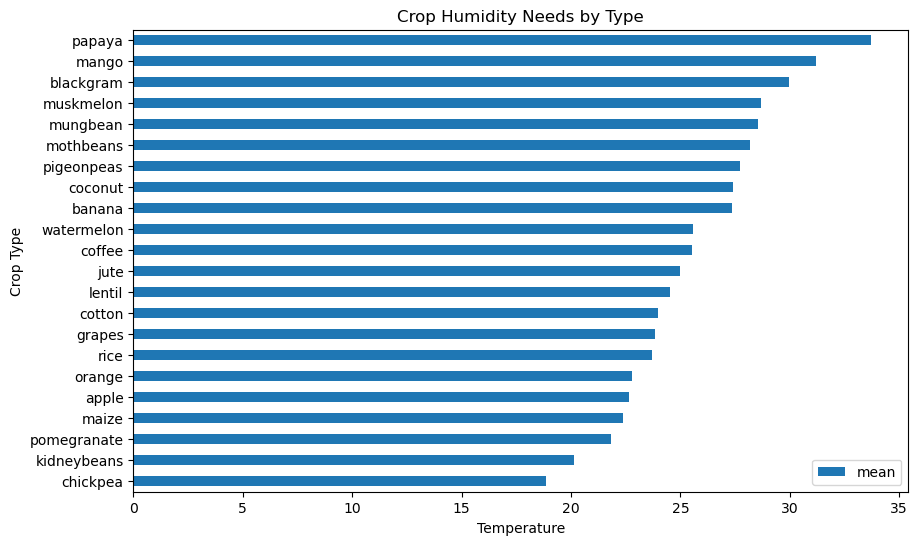

In [28]:
temperature_data = df.groupby('label')['temperature'].agg(['mean']).sort_values(by='mean', ascending=True)
# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
temperature_data.plot(kind='barh', ax=ax)
ax.set_xlabel('Temperature')
ax.set_ylabel('Crop Type')
ax.set_title('Crop Humidity Needs by Type')

plt.show()

In [29]:
df.groupby('label')['humidity'].agg(['mean', 'sum', 'max']).sort_values(by='mean', ascending=True)

,mean,sum,max
label,,,
chickpea,16.860439,1686.043942,19.969789
kidneybeans,21.605357,2160.535673,24.969699
pigeonpeas,48.061633,4806.163308,69.691413
mango,50.156573,5015.657270,54.964053
mothbeans,53.160418,5316.041803,64.955854
coffee,58.869846,5886.984630,69.948073
lentil,64.804785,6480.478468,69.923759
maize,65.092249,6509.224945,74.829137
blackgram,65.118426,6511.842559,69.961000


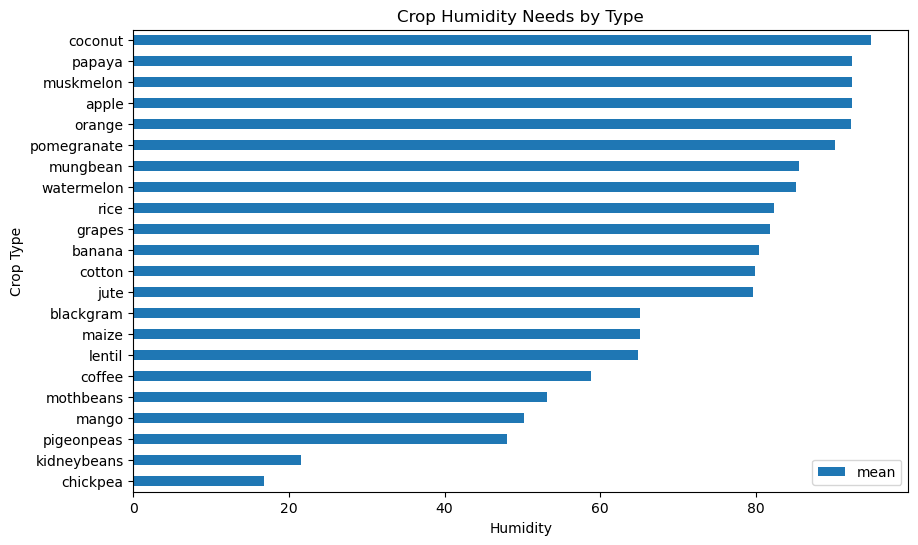

In [30]:
humidity_data = df.groupby('label')['humidity'].agg(['mean']).sort_values(by='mean', ascending=True)
# Plot the data

fig, ax = plt.subplots(figsize=(10, 6))
humidity_data.plot(kind='barh', ax=ax)
ax.set_xlabel('Humidity')
ax.set_ylabel('Crop Type')
ax.set_title('Crop Humidity Needs by Type')

plt.show()

In [31]:
df.groupby('label')['ph'].agg(['mean', 'sum', 'max']).sort_values(by='mean', ascending=True)

,mean,sum,max
label,,,
kidneybeans,5.749411,574.941059,5.998125
mango,5.766373,576.637280,6.967418
pigeonpeas,5.794175,579.417488,7.445445
apple,5.929663,592.966293,6.499227
coconut,5.976562,597.656213,6.470466
banana,5.983893,598.389318,6.490074
grapes,6.025937,602.593668,6.499605
maize,6.245190,624.518972,6.995844
muskmelon,6.358805,635.880545,6.781050


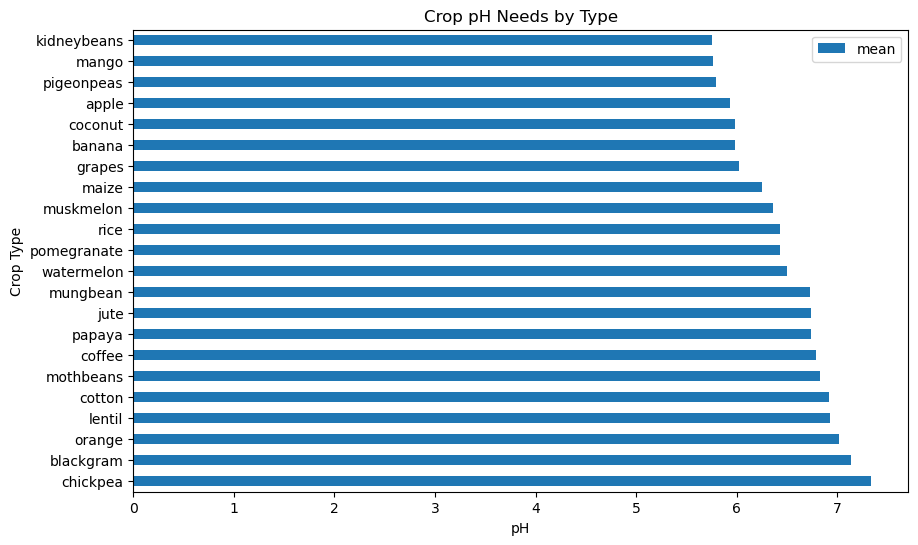

In [32]:
ph_data = df.groupby('label')['ph'].agg(['mean']).sort_values(by='mean', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
ph_data.plot(kind='barh', ax=ax)
ax.set_xlabel('pH')
ax.set_ylabel('Crop Type')
ax.set_title('Crop pH Needs by Type')

plt.show()

In [33]:
df.groupby('label')['rainfall'].agg(['mean', 'sum', 'max']).sort_values(by='mean', ascending=True)

,mean,sum,max
label,,,
muskmelon,24.689952,2468.995207,29.866814
lentil,45.680454,4568.045420,54.939377
mungbean,48.403601,4840.360090,59.872321
watermelon,50.786219,5078.621894,59.759800
mothbeans,51.198487,5119.848705,74.443307
blackgram,67.884151,6788.415118,74.915595
grapes,69.611829,6961.182889,74.915062
chickpea,80.058977,8005.897726,94.781896
cotton,80.398043,8039.804312,99.931008


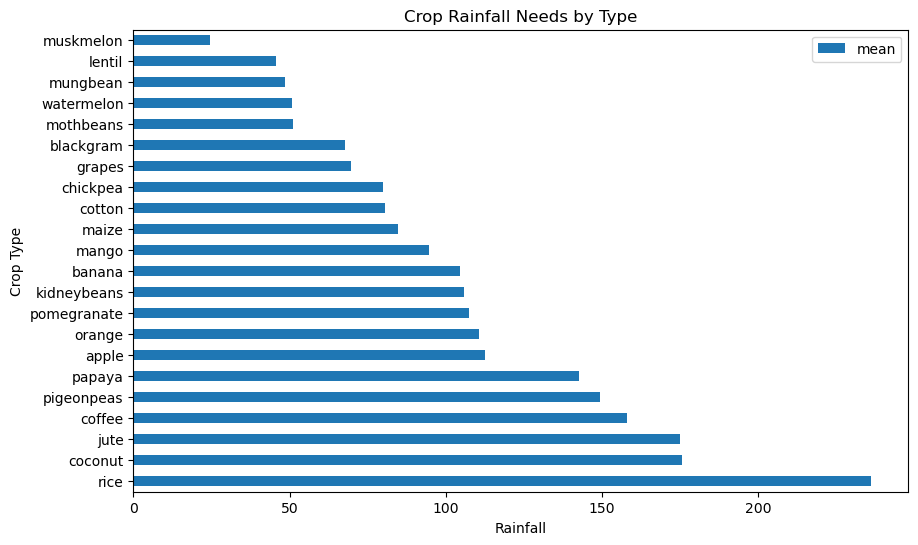

In [34]:
rainfall_data = df.groupby('label')['rainfall'].agg(['mean']).sort_values(by='mean', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
rainfall_data.plot(kind='barh', ax=ax)
ax.set_xlabel('Rainfall')
ax.set_ylabel('Crop Type')
ax.set_title('Crop Rainfall Needs by Type')

plt.show()

In [35]:
#if i want to organize all of them with one code
for crop in crop_df_dict:
    print(f"DataFrame for {crop}:")
    print(crop_df_dict[crop].describe())

DataFrame for rice:
         Nitrogen  phosphorus   potassium  temperature    humidity  \
count  100.000000  100.000000  100.000000   100.000000  100.000000   
mean    79.890000   47.580000   39.870000    23.689332   82.272822   
std     11.917981    7.904966    2.946167     2.031272    1.418381   
min     60.000000   35.000000   35.000000    20.045414   80.122675   
25%     69.000000   41.000000   38.000000    21.927064   80.952094   
50%     80.000000   47.000000   40.000000    23.734837   82.189357   
75%     91.000000   54.250000   42.000000    25.513702   83.470254   
max     99.000000   60.000000   45.000000    26.929951   84.969072   

               ph    rainfall  
count  100.000000  100.000000  
mean     6.425471  236.181114  
std      0.768692   34.291825  
min      5.005307  182.561632  
25%      5.869992  204.334023  
50%      6.363804  233.119859  
75%      7.039147  264.126903  
max      7.868475  298.560117  
DataFrame for maize:
        Nitrogen  phosphorus  potassium 

In [36]:
#Crop types can be classified based on their needs for phosphorus, potassium, temperature, humidity, pH, and rainfall in detail.
#It is possible to reach detailed calculations for each crop and perform further analysis.
#I hope you enjoyed.